In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('wine.data', header=None)

In [13]:
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 
              'Alcalinity of ash', 'Magnesium', 'Total phenols', 
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# 导入必要的库
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# 查看数据集基本信息和格式
print(df.shape)

(178, 14)


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [17]:
# 检查重复值和缺失值，并进行数据清洗和转换
print(df.duplicated().sum())

0


In [18]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [19]:
# 对数据进行标准化处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16064\3730282418.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.91390522  0.01814502  0.08835836  0.93091845  1.28198515  0.86070511
 -0.26270834  1.49262517 -0.192495   -0.12228166  0.36921172 -0.33292168
 -0.75420173 -0.61377505  0.1585717   0.86070511  1.42241183  1.07134513
  0.57985175  1.14155847  1.84369188  0.1585717   0.08835836 -0.33292168
 -0.26270834  1.7032652  -0.47334836 -0.40313502  0.50963841 -0.26270834
  0.08835836  0.43942506  0.29899838  2.26497192  0.72027843  0.01814502
  0.72027843 -0.12228166 -0.12228166  1.98411856  1.21177181 -0.68398839
  0.08835836  0.22878504  0.50963841  0.79049177  0.1585717   0.08835836
  0.22878504  0.57985175 -0.5435617  -0.40313502  0.79049177  1.07134513
  1.28198515  1.14155847  1.28198515  0.1585717   0.57985175 -0.82441507
  0.08835836  0.01814502 -0.40313502 -0.89462841  0.29899838 -0.12228166
 -1.

<Figure size 1920x1440 with 0 Axes>

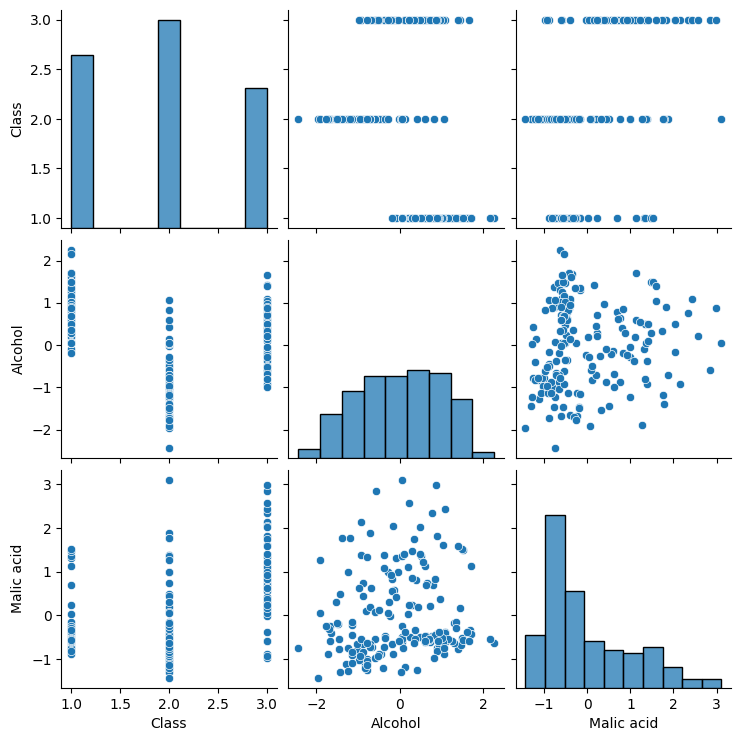

In [20]:
# 对数据进行可视化分析
plt.figure(dpi=300)
sns.pairplot(df.iloc[:,:3], hue=None, diag_kind='hist')
plt.savefig('figs/2-3.png', dpi=300)
plt.show()

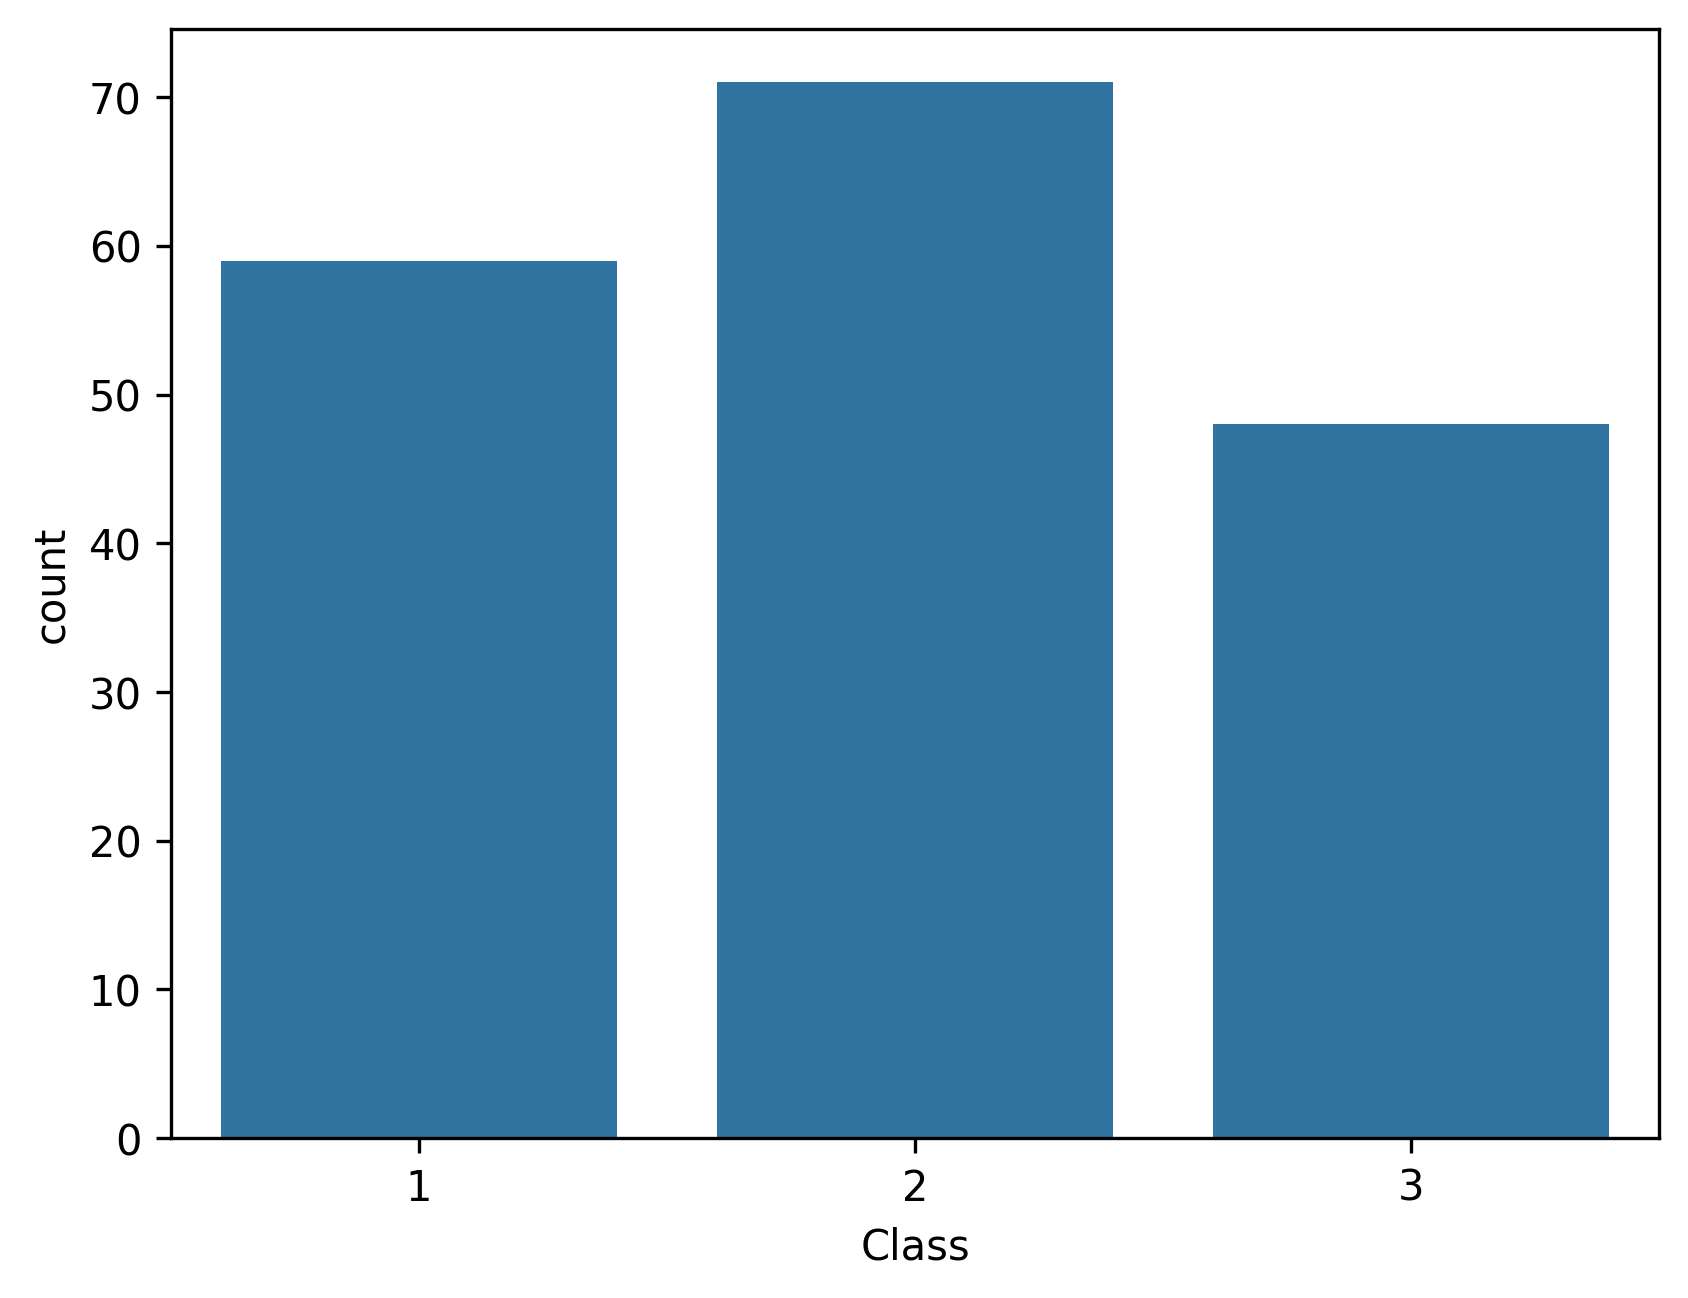

In [21]:
plt.figure(dpi=300)
sns.countplot(x = df['Class'])
plt.savefig('figs/2-4.png', dpi=300)
plt.show()

In [22]:
# 对数据进行统计分析
df.iloc[:, :4].describe()

,Class,Alcohol,Malic acid,Ash
count,178.000000,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.938202,-8.382808e-16,-1.197544e-16,-8.370333e-16
std,0.775035,1.002821e+00,1.002821e+00,1.002821e+00
min,1.000000,-2.434235e+00,-1.432983e+00,-3.679162e+00
25%,1.000000,-7.882448e-01,-6.587486e-01,-5.721225e-01
50%,2.000000,6.099988e-02,-4.231120e-01,-2.382132e-02
75%,3.000000,8.361286e-01,6.697929e-01,6.981085e-01
max,3.000000,2.259772e+00,3.109192e+00,3.156325e+00


In [23]:
df.iloc[:, :3].corr()

,Class,Alcohol,Malic acid
Class,1.000000,-0.328222,0.437776
Alcohol,-0.328222,1.000000,0.094397
Malic acid,0.437776,0.094397,1.000000


In [24]:
from scipy.stats import ttest_ind
print(ttest_ind(df.loc[df['Class'] == 1, 'Alcohol'], df.loc[df['Class'] == 2, 'Alcohol']))

TtestResult(statistic=16.478551495156488, pvalue=1.9551698789383382e-33, df=128.0)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X = df.drop('Class', axis=1)
y = df['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(142, 13)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")

Test Accuracy: 1.000
